In [80]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

# Policy Evaluation

Here, we implement the grid world example from the RL Lecture 3 by Davin Silver for policy evaluation [see example in video](https://youtu.be/Nd1-UUMVfz4?t=1736)

Policy evaluation for a random policy $\pi$ is done by iteratively applying the _Bellman Expactation Equation_.

$$
 v_{k+1}(s) = \sum_{a \in A} \pi(a|s) \cdot (R^a_s + \gamma \cdot \sum_{s' \in S} P^a_{ss'} v_k(s')
$$

That is, we use the reward of the current movement and state and add the value function of the state where we end up executing that movement. Importantly, we do that for all possible actions with a probability of $\pi(a|s)$. For a random policy and a grid world with 4 movements $\pi(\cdot|\cdot) = 0.25$

This is done for all states $s$ in the environment.

In [237]:
import numpy as np
import matplotlib.pyplot as plt
import plotting
plotting.set_layout(drawing_size=15)


## Define the Environment

* In every state (except goal state) a moment has a cost of -1
* In a goal state, thers is no cost for moving
* If the agent is in a goal state, do not execute any moevement


In [197]:

class environment():
    """ This class defines all the necessary properties of the environment. 
        For now, the environment is a nxn rectangular grid"""
    
    def __init__(self,n=5,s_start=(0,0),s_goals=[(4,4)]):
        """ n: defines the length and width of the environment
            s_start: defines the starting position of the agent (x-,y-position)
            """ 
        
        # Define the grid
        self.n_grid = n
        
        # Agent position
        self.x_agent = s_start[0]
        self.y_agent = s_start[1]
        # Agent actions
        self.actions = ['n','e','s','w']
        
        # Define rewards
        self.rewards = np.ones((n,n)) * (-1)
        # Define goal states
        self.s_goals = s_goals
        for g_i,g in enumerate(s_goals):
            self.rewards[g] = 0
            
            
            
    
    
    def move(self,a=None,state=None):
        """ Moves the agent from its current state to the next state given action a
            and returns a reward for that movement (cost of current state or new state ??)
            a: is the action
            state: is optional and can be the state from which the action is executed
            
        """

        assert(a in self.actions)
        
        # If state is given, use it as an indication that the movement is just simulated.
        # Do not update internal states
        if state:
            x_s = state[0]
            y_s = state[1]
        else:
            x_s = self.x_agent
            y_s = self.y_agent
            
        # If agent is in a goal state, do not move anymore
        if (x_s, y_s) in self.s_goals:
            return x_s,y_s
        
        x = x_s
        y = y_s
        
        # execute movement. For now, the environment is deterministic
        if a == 'n':
            y = y -1
        if a == 's':
            y = y +1
        if a == 'e':
            x = x +1
        if a == 'w':
            x = x -1
        
        # make sure to stay in the environment. if an acion moves the agent outside, just remain in current state
        if x < 0 or y < 0 or x >= self.n_grid or y >= self.n_grid:
            # do nothing and return rewards of current state
            return x_s,y_s
        else:
            # set new state and return rewards of new state
            
            # update internal variables if its a real movement
            if state:
                pass
            else:
                self.x_agent = x
                self.y_agent = y
            return x,y
    
    def get_reward(self, state):
        # Returns the reward for a given state
        return self.rewards[state[0],state[1]]
        
    
    def plot_env(self):
        """ Plots the with the agent's position and rewars"""
        
        fig = plt.figure(figsize=(10,5))
        
        axes = fig.subplots(1,2)
        
        # Agent's position
        ax = axes[0]
        grid = np.zeros((self.n_grid,self.n_grid))
        grid[self.y_agent,self.x_agent] = 0.01
        ax.matshow(grid, cmap='jet')
        ax.set_title('Agent\'s Position')

        # Rewards
        ax = axes[1]
        ax.matshow(self.rewards)
        
        for (i, j), z in np.ndenumerate(self.rewards):
            ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
        
        ax.set_title('Rewards')

            
        plt.show()
        


## Define the Agent

Agent stores:
* The policy
* value function
* It has a model of the environment

In [208]:

class agents():
    """ This class defines the agent 
    """
    
    def __init__(self,n=5, gamma=1, pos_start=(0,0),env=None):
        """ n: defines the length and width of the environment
            gamma: the discount factor
            pos_start: defines the starting position of the agent (x-,y-position)
            env: an environment class to use as an internal model
            """ 
        
        if env:
            self.model_env = env
        else:
            print('No environment given. Cannot simulate movements')
        
        # Store the discount factor 
        self.gamma = gamma
        
        # Store size of environment
        self.n_grid = n
        
        # set the starting position
        self.x = pos_start[0]
        self.y = pos_start[1]
            
        # Store the value function for each state
        # start with zero
        self.v = np.zeros((n,n))
        
        # Initialize the policy
        # initially the probability to choose an action given a state is 1/4 
        self.policy = np.ones((self.n_grid,self.n_grid,len(self.model_env.actions))) / 4
        
        # Define transition matrix P^a_ss
        self.P = np.zeros((self.n_grid,self.n_grid,len(self.model_env.actions)))
    

        
        
    
    def random_move(self):
        # Chooses a random movement (independent of the state)
        i = np.random.randint(0,len(self.actions))
        return self.actions[i]
    
    
    def udate_policy(self):
        #
        pass
    
    
    def policy_iteration(self):
        # Given the reward update the value function of all states
#         self.v[self.y,self.x] = r + self.gamma * np.sum(  ) 
        v = np.zeros(self.v.shape)
        # walk over all states
        for i in range(np.size(self.v,0)):
            for ii in range(np.size(self.v,1)):
                # walk over all actions accoriding to the policy
                for a_i,a_probability in enumerate(self.policy[i,i]):
                    # walk over alle possible reachable states given that acion
                    if a_i == 0:
                        a = 'n'
                    if a_i == 1:
                        a = 'e'
                    if a_i == 2:
                        a = 's'
                    if a_i == 3:
                        a = 'w'
                            
                    # simulate movement
                    x,y = self.model_env.move(a,(i,ii))
                    v[i,ii] += a_probability * ( self.model_env.rewards[i,ii] + self.gamma * self.v[x,y])
        
        self.v = np.copy(v)

        

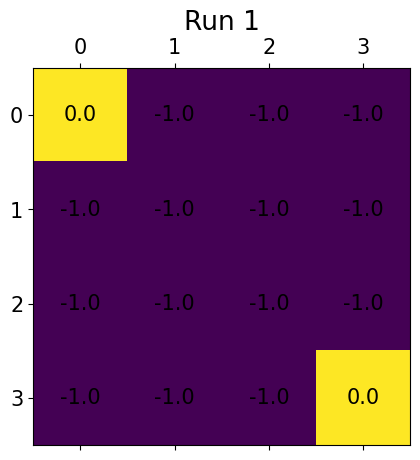

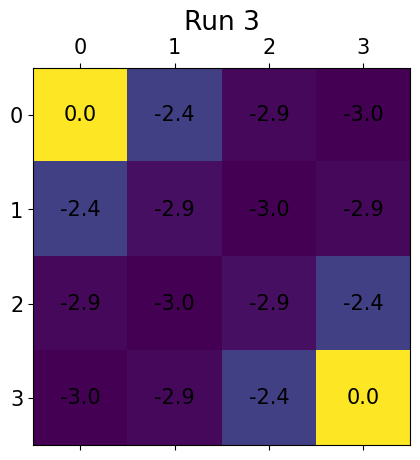

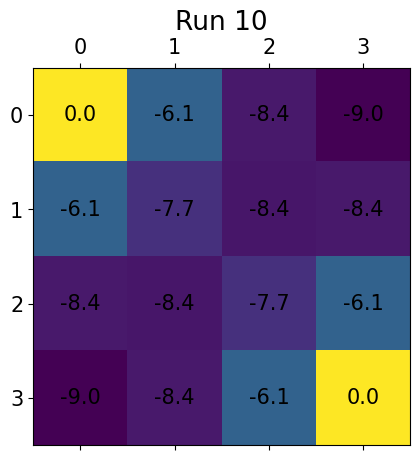

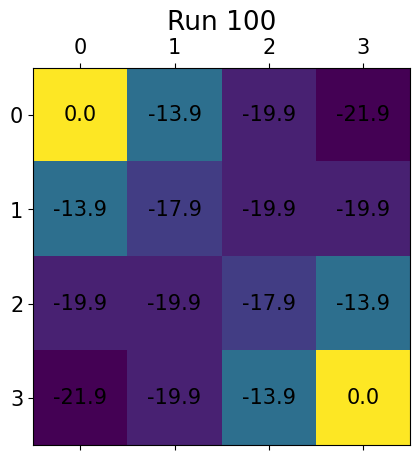

In [238]:
# Set up the environmental variables
n = 4
agent_start = (1,1)
goal_states = [(0,0),(3,3)]
gamma = 1

# initialize everything
env = environment(n=4, s_start=agent_start,s_goals=goal_states)
agent = agents(n=4, gamma = gamma, pos_start=agent_start,env=env)


# run the policy iteration
for i in range(100):
    agent.policy_iteration()
    
    i = i+1

    if i==0 or i == 1 or i == 3 or i == 10 or i == 100:
        # plot the results
        fig =plt.figure(figsize=(5,5))
        ax = fig.add_subplot(111)
        c = ax.matshow(agent.v)
        for (k, j), z in np.ndenumerate(agent.v):
            ax.text(j, k, '{:0.1f}'.format(z), ha='center', va='center')
        plt.title('Run {0:}'.format(i))
        plt.show()        